In [154]:
#importing relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#choosing to ignore warning messages 
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [155]:
#Uploading the Mammographic mass dataset from the UCI repository
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'

#Specifying the column names
column_names = ["BI-RADS assessment", "age", "mass_shape","mass_margin","mass_density","severity_class"]

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

#Viewing the top 5 rows of the dataset
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [156]:
#Using df.info() function to determine the type of data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    961 non-null object
age                   961 non-null object
mass_shape            961 non-null object
mass_margin           961 non-null object
mass_density          961 non-null object
severity_class        961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [157]:
#viewing the column names
df.columns

Index(['BI-RADS assessment', 'age', 'mass_shape', 'mass_margin',
       'mass_density', 'severity_class'],
      dtype='object')

In [158]:
#Null values are shwon as '?', replacing all null values with an empty space
df.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1


In [159]:
#Converting all values from object data type to a numeric value either integer or float
df = df.apply(pd.to_numeric, errors ='ignore')

In [160]:
#Checking that the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    959 non-null float64
age                   956 non-null float64
mass_shape            930 non-null float64
mass_margin           913 non-null float64
mass_density          885 non-null float64
severity_class        961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [161]:
#Using .describe function to get an overview of the descriptive statistics of all of the attibutes and target class values
df.describe()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [162]:
#getting the mode values for all of the attributes and the target class.
df.mode()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,4.0,59.0,4.0,1.0,3.0,0


In [163]:
#The BI-RADS assessment feature is non-predictive and will be dropped.
df = df.drop(columns=["BI-RADS assessment"])
df.head()

,age,mass_shape,mass_margin,mass_density,severity_class
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [164]:
#Finding the number of missing values in each column
df.isnull().sum() 

age                5
mass_shape        31
mass_margin       48
mass_density      76
severity_class     0
dtype: int64

In [165]:
#age is a continuous ordinal variable so we can replace null values with mean age values
df.age.fillna(df.age.mean(), inplace=True) 

In [166]:
#Null values from the age feature column have been imputed
df.isnull().sum()

age                0
mass_shape        31
mass_margin       48
mass_density      76
severity_class     0
dtype: int64

In [167]:
#Dropping all rows with null values
df = df.dropna()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 960
Data columns (total 5 columns):
age               836 non-null float64
mass_shape        836 non-null float64
mass_margin       836 non-null float64
mass_density      836 non-null float64
severity_class    836 non-null int64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [169]:
#Checking that the DataFrame dose not have any null values
df.isnull().sum()

age               0
mass_shape        0
mass_margin       0
mass_density      0
severity_class    0
dtype: int64

In [326]:
#Getting dummy variables for the attributes that have nominal values
df2 = pd.get_dummies(data=df, columns=['mass_shape', 'mass_margin'])

,age,mass_density,severity_class,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0
0,67.0,3.0,1,0,0,1,0,0,0,0,0,1
2,58.0,3.0,1,0,0,0,1,0,0,0,0,1
3,28.0,3.0,0,1,0,0,0,1,0,0,0,0
8,57.0,3.0,1,1,0,0,0,0,0,0,0,1
10,76.0,3.0,1,1,0,0,0,0,0,0,1,0


In [171]:
df2.columns

Index(['age', 'mass_density', 'severity_class', 'mass_shape_1.0',
       'mass_shape_2.0', 'mass_shape_3.0', 'mass_shape_4.0', 'mass_margin_1.0',
       'mass_margin_2.0', 'mass_margin_3.0', 'mass_margin_4.0',
       'mass_margin_5.0'],
      dtype='object')

In [172]:
df2 = df2[['age', 'mass_density', 'mass_shape_1.0',
       'mass_shape_2.0', 'mass_shape_3.0', 'mass_shape_4.0', 'mass_margin_1.0',
       'mass_margin_2.0', 'mass_margin_3.0', 'mass_margin_4.0',
       'mass_margin_5.0','severity_class']]

In [173]:
#Checking the shape of the DataFrame
df2.shape

(836, 12)

In [174]:
# Checking the column names of the DataFrame with the newly added dummy variables
df2.columns

Index(['age', 'mass_density', 'mass_shape_1.0', 'mass_shape_2.0',
       'mass_shape_3.0', 'mass_shape_4.0', 'mass_margin_1.0',
       'mass_margin_2.0', 'mass_margin_3.0', 'mass_margin_4.0',
       'mass_margin_5.0', 'severity_class'],
      dtype='object')

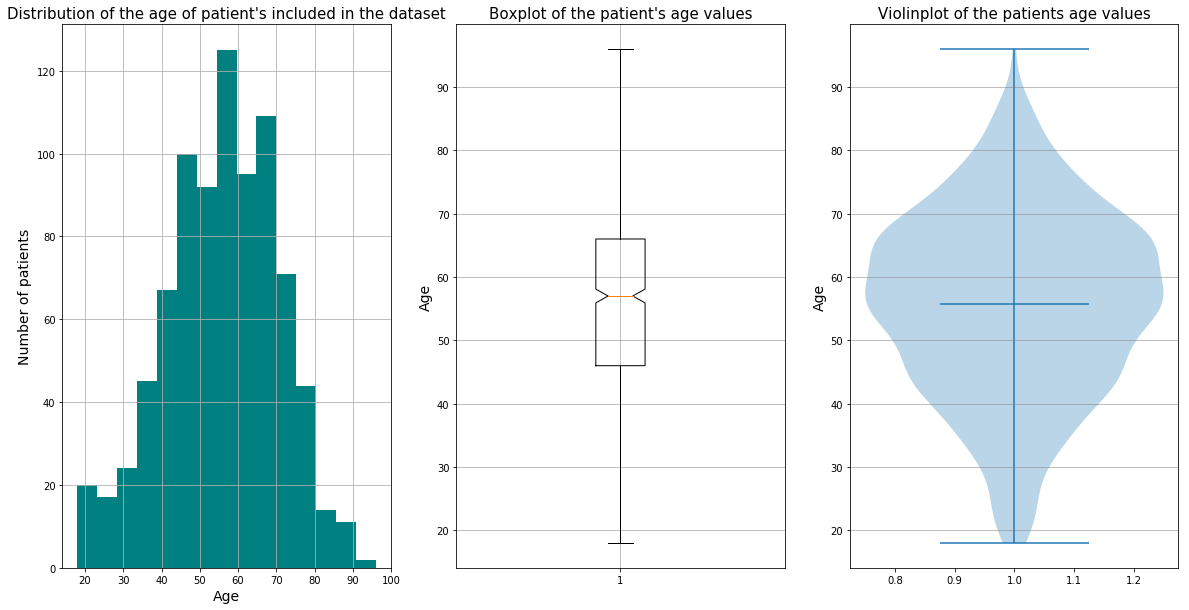

In [175]:
#Visualising the distribution of the age of the patients using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.age,histtype='bar',bins=15, color = 'teal') 
plt.grid(True)
plt.xlabel('Age',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the age of patient's included in the dataset",fontsize=15)

plt.subplot(1,3,2)
plt.boxplot(df.age,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Age',fontsize=14)
plt.title("Boxplot of the patient's age values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.age, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Age',fontsize=14)
plt.title("Violinplot of the patients age values",fontsize=15)

plt.show()


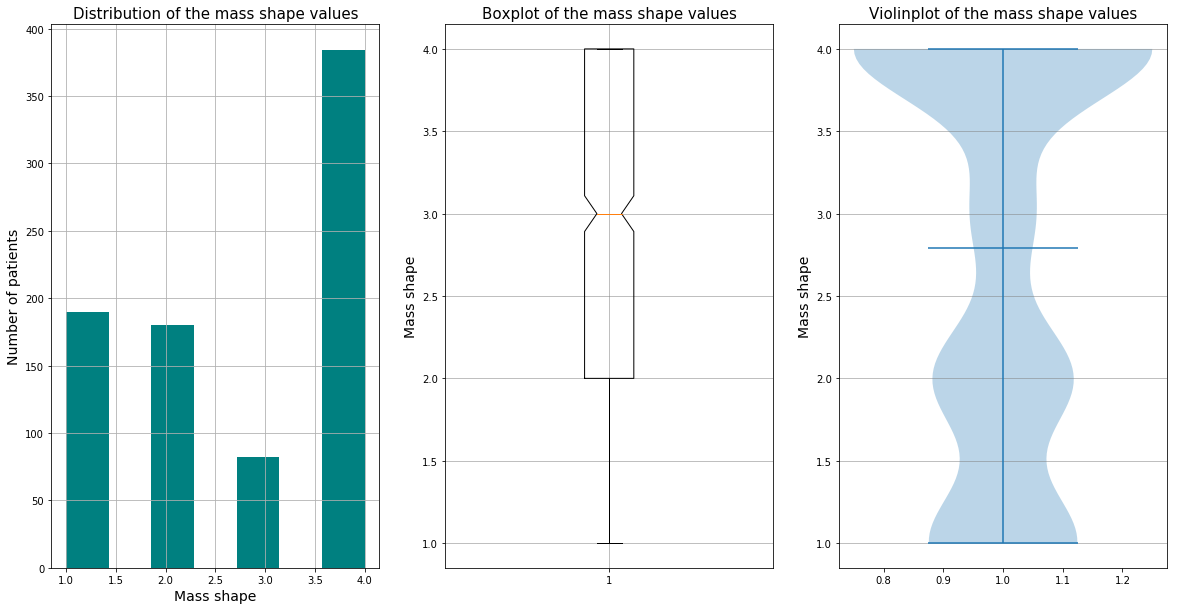

In [176]:
#Visualising the distribution of the mass shape values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_shape,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass shape',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass shape values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_shape,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass shape',fontsize=14)
plt.title("Boxplot of the mass shape values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_shape, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass shape',fontsize=14)
plt.title("Violinplot of the mass shape values",fontsize=15)

plt.show()

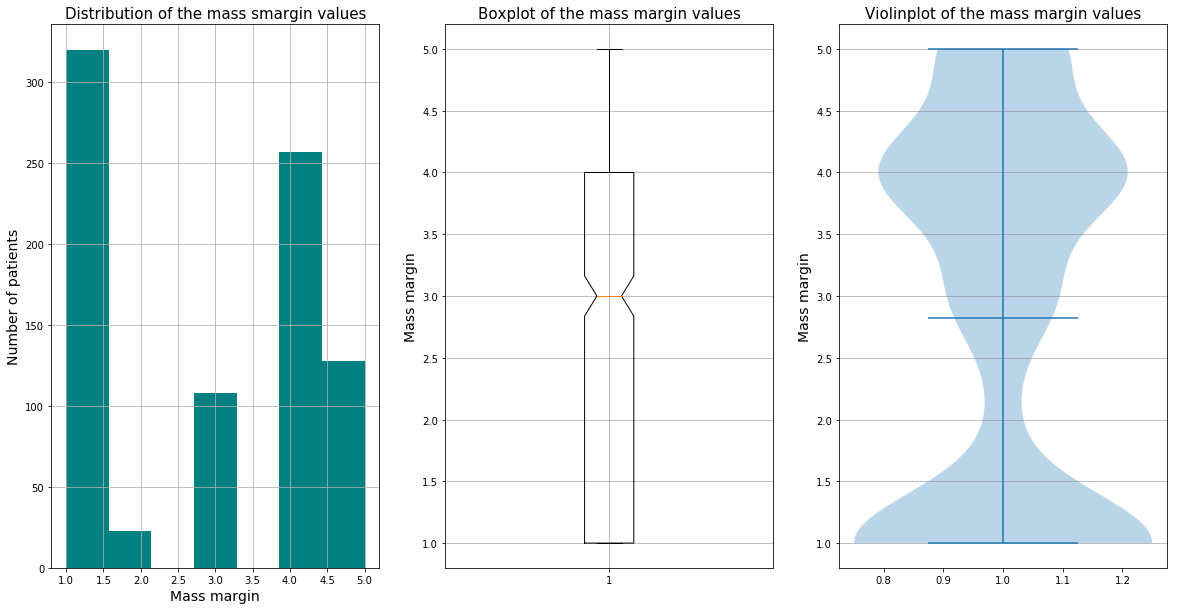

In [177]:
#Visualising the distribution of the mass margin values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_margin,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass margin',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass smargin values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_margin,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass margin',fontsize=14)
plt.title("Boxplot of the mass margin values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_margin, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass margin',fontsize=14)
plt.title("Violinplot of the mass margin values",fontsize=15)

plt.show()

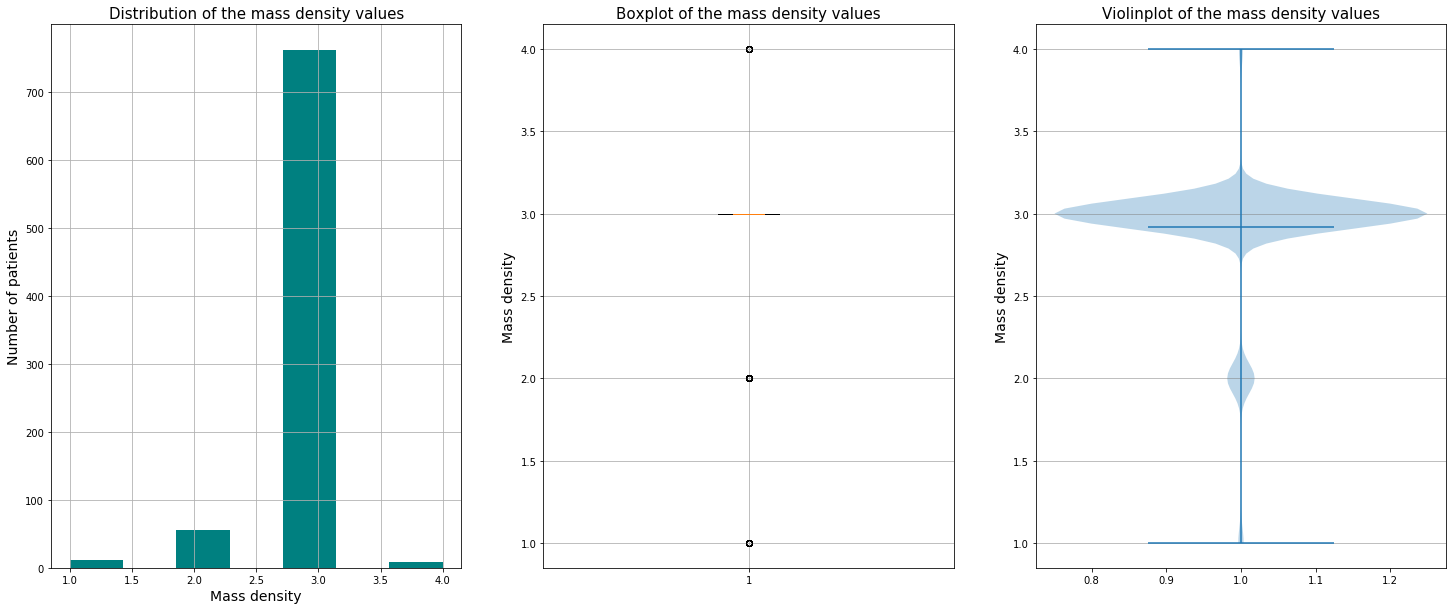

In [178]:
#Visualising the distribution of the mass density values using histogram, boxplot and violinplot
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
plt.hist(df.mass_density,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass density',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass density values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_density,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass density',fontsize=14)
plt.title("Boxplot of the mass density values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_density, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass density',fontsize=14)
plt.title("Violinplot of the mass density values",fontsize=15)

plt.show()

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
mass_shape        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
mass_margin       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
mass_density         AxesSubplot(0.125,0.391471;0.227941x0.222059)
severity_class    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

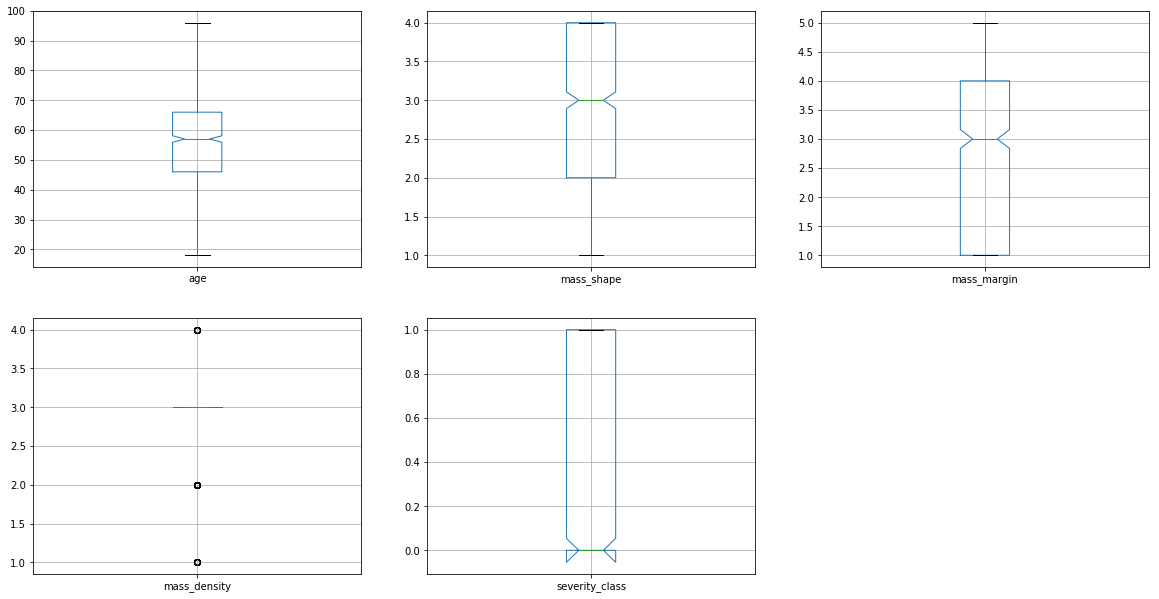

In [179]:
#Visualising the boxplots of all of the attributes
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,16), grid = True, notch = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260B2C14AC8>,
      dtype=object)

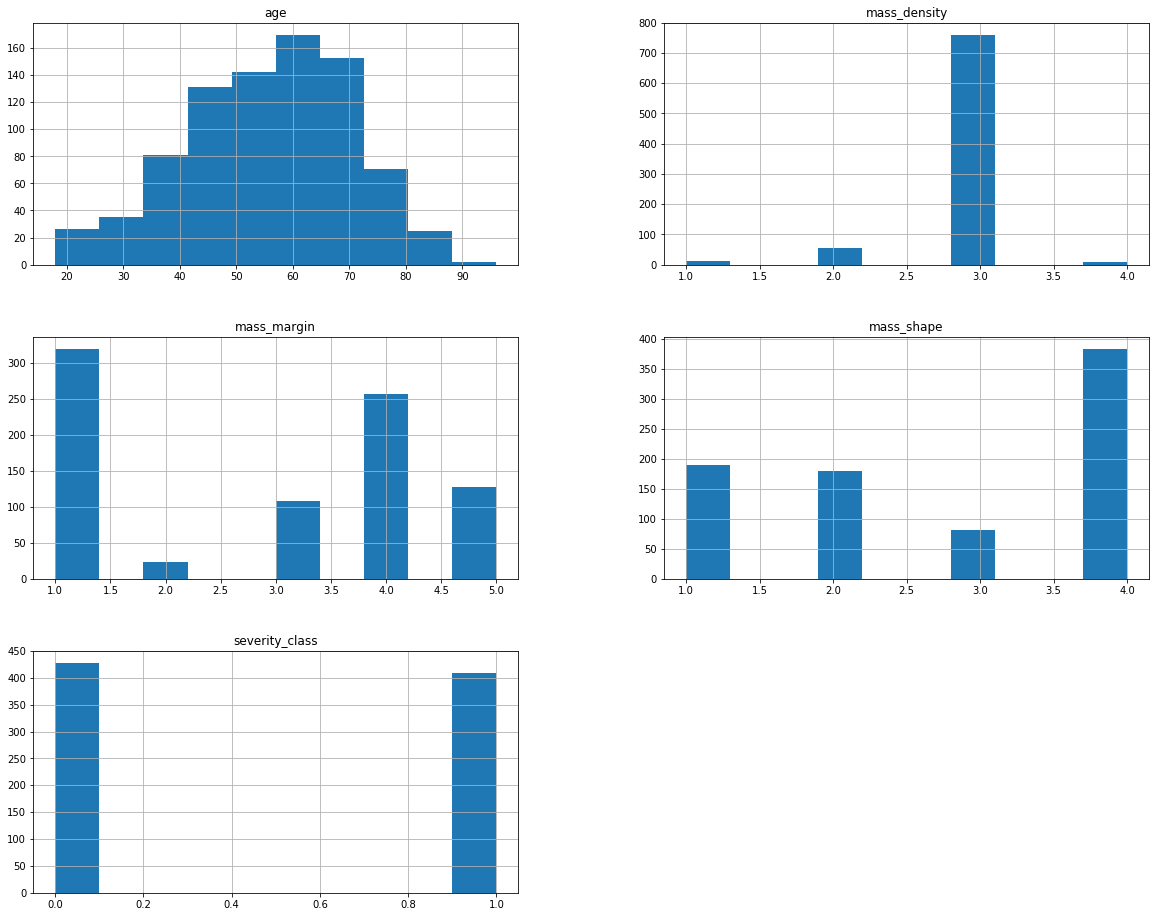

In [180]:
#Visalising the distribution of all of the attributes using histograms
df.hist(figsize=(20,16),bins = 10 )

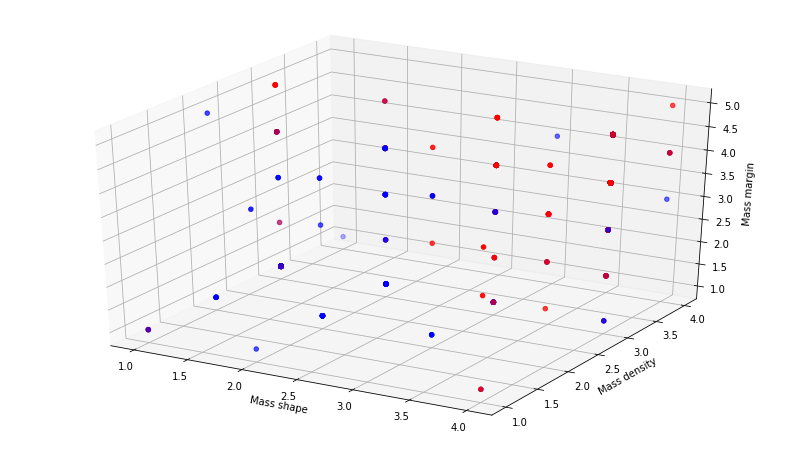

In [181]:
#Plotting the mass margin, mass shape and mass density features in a 3D space

feature1 = df['mass_shape'].values
feature2 = df['mass_density'].values 
feature3 = df['mass_margin'].values

df['severity_class']=df['severity_class'].astype('str')

c = df['severity_class'].values
df['severity_class']= df['severity_class'].astype('int')
c[c=='0'] = 'b' #benign
c[c=='1'] = 'r' #malignant

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('Mass shape')
ax.set_ylabel('Mass density')
ax.set_zlabel('Mass margin')

plt.show()

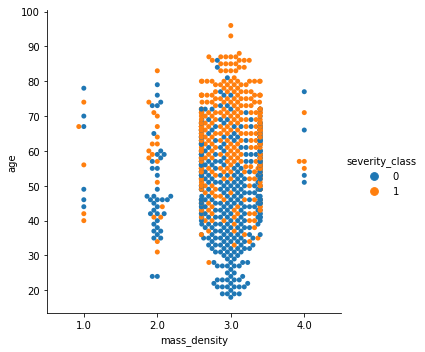

In [182]:
#Plotting age and mass density in a swarmplot 
sns.catplot(x= "mass_density", y="age", hue = "severity_class", kind= "swarm", data=df)

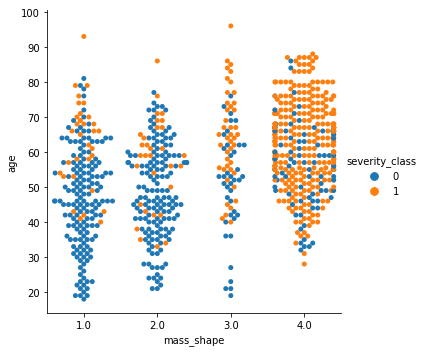

In [183]:
##Plotting age and mass mass in a swarmplot 
sns.catplot(x= "mass_shape", y="age", hue = "severity_class", kind= "swarm", data=df)

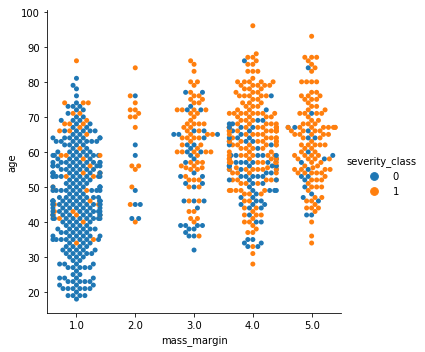

In [184]:
#Plotting age and mass margin in a swarmplot 
sns.catplot(x= "mass_margin", y="age", hue = "severity_class", kind= "swarm", data=df)

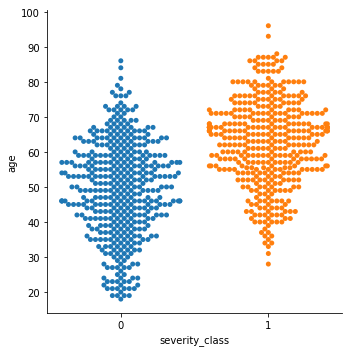

In [185]:
import seaborn as sns
sns.catplot(x= "severity_class", y="age", hue = "severity_class", kind= "swarm", data=df)

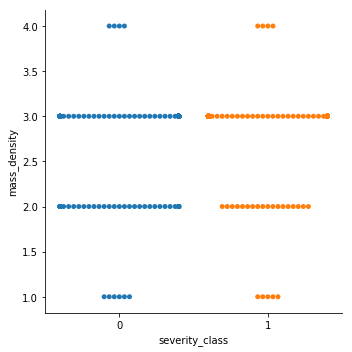

In [186]:
#Plotting severity class  and mass density in a swarmplot 
sns.catplot(x= "severity_class", y="mass_density", hue = "severity_class", kind= "swarm", data=df);

In [187]:
#Plotting the correlation values betveen all of the feature values
df2.corr()

,age,mass_density,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0,severity_class
age,1.000000,0.052300,-0.245834,-0.211050,0.043183,0.355031,-0.437622,0.046628,0.102079,0.223493,0.188069,0.453679
mass_density,0.052300,1.000000,-0.017075,-0.082659,-0.013047,0.090324,-0.128179,0.019370,0.031049,0.048350,0.073346,0.069577
mass_shape_1.0,-0.245834,-0.017075,1.000000,-0.284083,-0.178847,-0.499870,0.553604,-0.056317,-0.174844,-0.299457,-0.175108,-0.346773
mass_shape_2.0,-0.211050,-0.082659,-0.284083,1.000000,-0.172745,-0.482815,0.341868,0.000851,-0.088964,-0.134556,-0.206564,-0.330958
mass_shape_3.0,0.043183,-0.013047,-0.178847,-0.172745,1.000000,-0.303961,-0.077672,0.092054,0.088810,0.024333,-0.050872,0.023983
mass_shape_4.0,0.355031,0.090324,-0.499870,-0.482815,-0.303961,1.000000,-0.701158,-0.008285,0.167405,0.348281,0.347991,0.550274
mass_margin_1.0,-0.437622,-0.128179,0.553604,0.341868,-0.077672,-0.701158,1.000000,-0.132455,-0.303317,-0.524659,-0.334841,-0.581795
mass_margin_2.0,0.046628,0.019370,-0.056317,0.000851,0.092054,-0.008285,-0.132455,1.000000,-0.064784,-0.112059,-0.071517,0.055230
mass_margin_3.0,0.102079,0.031049,-0.174844,-0.088964,0.088810,0.167405,-0.303317,-0.064784,1.000000,-0.256610,-0.163770,0.116238
mass_margin_4.0,0.223493,0.048350,-0.299457,-0.134556,0.024333,0.348281,-0.524659,-0.112059,-0.256610,1.000000,-0.283280,0.277846


Text(0.5, 1.0, 'Correlation Matrix for mammographic masses dataset')

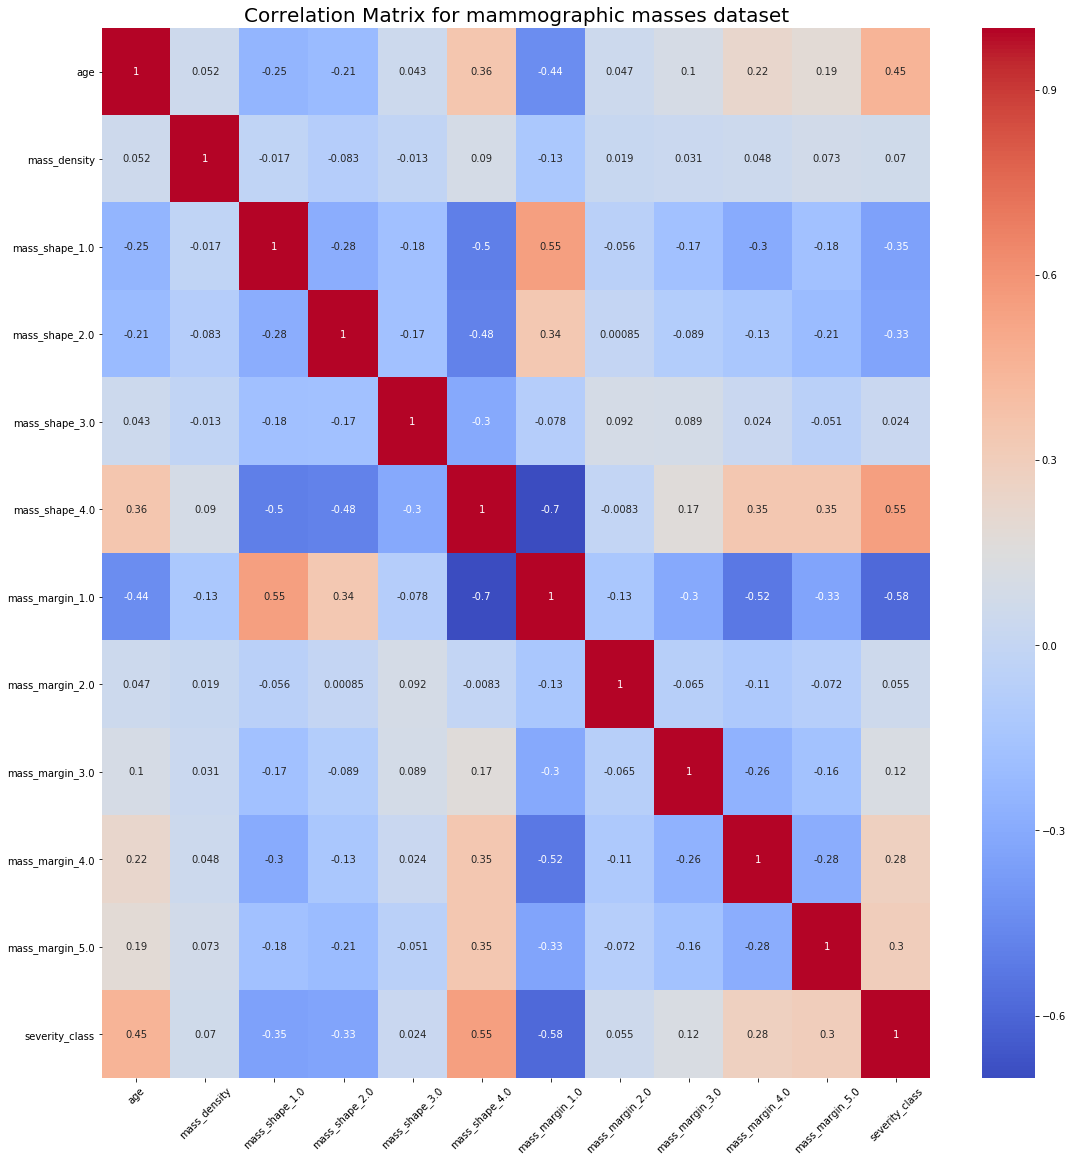

In [188]:
#Ploting the correlation values ina heatplot
fig, ax = plt.subplots(figsize=(16,16))  
corr1 = df2.corr()
ax = sns.heatmap(corr1, annot = True, cmap="coolwarm")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.title('Correlation Matrix for mammographic masses dataset',fontsize = 20)

In [343]:
# Creating the input variable for the classifiers
X = df2.drop('severity_class',axis = 1) # selecting the feature colums, only excluding the target coulumn 'class'
y = df2['severity_class']

In [203]:
#determining the class distribution
print ("number of all feature vectors:", y.size)
print ("number of malignant feature vectors: ", np.sum(y))
print ("number of benign feature vectors: ",  y.size-np.sum(y))

number of all feature vectors: 836
number of malignant feature vectors:  408
number of benign feature vectors:  428


In [204]:
#Determining the class distribution as a percentage
benign_data_raw = y[y == 0]
malign_data_raw = y[y == 1]

percentage = len(malign_data_raw)/float(len(benign_data_raw))
sample_size = int(percentage*len(benign_data_raw))


print ("\nPercentage of benign tumours            :", len(benign_data_raw) / float(len(y)))
print ("Percentage of malign tumours            :", len(malign_data_raw) / float(len(y)))
print ("\nTotal number of data in our new dataset :", len(y))


Percentage of benign tumours            : 0.5119617224880383
Percentage of malign tumours            : 0.4880382775119617

Total number of data in our new dataset : 836


In [348]:
#Spliting the data into training and testing sets, 80% of data will be used for training and 20% of data is kept aside 
#for testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [349]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [350]:
#Calculating the variance explained number of different feature components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([2.73852302e-01, 1.29842744e-01, 1.15062126e-01, 1.13078767e-01,
       1.00861150e-01, 8.78810911e-02, 8.64798500e-02, 6.67247316e-02,
       2.62172382e-02, 3.49234605e-33, 3.46770749e-34])

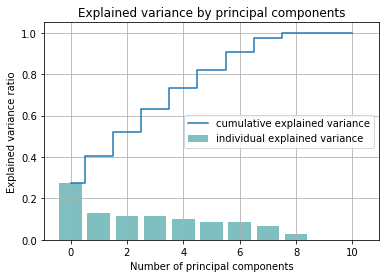

In [351]:
#Plotting the The variance explained ratio and the cumulative variance
plt.bar(np.arange(11), pca.explained_variance_ratio_, alpha=0.5, color = 'teal', align='center',label='individual explained variance')
plt.step(np.arange(11), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')
plt.grid(True)
plt.legend(loc='best')
plt.title('Explained variance by principal components')
plt.show()

In [352]:
#Determining the effect that different number of PCA components have on the model accuracy
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 11):
        pipe_svc = Pipeline([('scl', StandardScaler()),
                             ('pca', PCA(n_components=i)),
                             ('clf', SVC(probability=True, verbose = False))])
        
        pipe_svc.fit(X_train, y_train)
        results.append([i, pipe_svc.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[ 1.        ,  0.76190476],
       [ 2.        ,  0.74404762],
       [ 3.        ,  0.76190476],
       [ 4.        ,  0.75595238],
       [ 5.        ,  0.75      ],
       [ 6.        ,  0.75595238],
       [ 7.        ,  0.75595238],
       [ 8.        ,  0.73809524],
       [ 9.        ,  0.74404762],
       [10.        ,  0.74404762]])

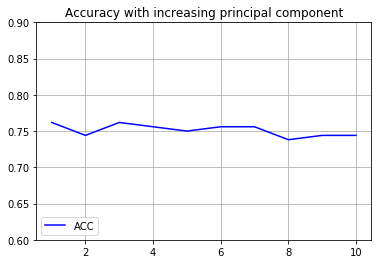

In [353]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.title("Accuracy with increasing principal component")
plt.show()

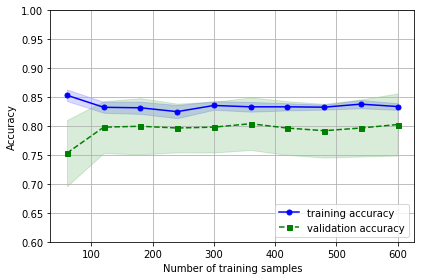

In [354]:
#learning curve to help determine if the model is likely to overfit or underfit
pipe_svm = make_pipeline(StandardScaler(),
                    SVC(probability=True, verbose = False))


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svm,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1])
plt.title('Learning curve to determines cross-validated training and test scores for different training set sizes')
plt.tight_layout()
plt.show()

 1) age                            0.426027
 2) mass_margin_1.0                0.208843
 3) mass_shape_4.0                 0.148439
 4) mass_shape_2.0                 0.058534
 5) mass_margin_5.0                0.033515
 6) mass_shape_1.0                 0.031595
 7) mass_density                   0.031479
 8) mass_margin_4.0                0.025168
 9) mass_shape_3.0                 0.013925
10) mass_margin_3.0                0.012786
11) mass_margin_2.0                0.009689


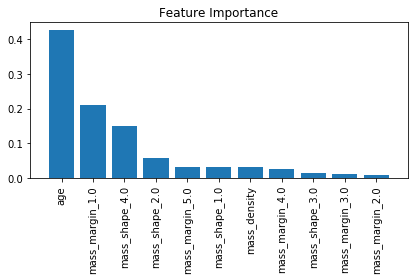

In [355]:
#Selecting the most impportant features to be used for 
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns[:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [356]:
#Redefining the features to be used for building the model, only including the 5 most important featres
X=df2[['age','mass_margin_1.0', 'mass_shape_4.0','mass_shape_2.0','mass_margin_5.0']]

In [357]:
#Spliting the data with new predictive features into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [358]:
pipelines_SVC = []

In [359]:
#Put together the Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca',PCA(n_components = 3)),
                    ('clf',SVC(probability=True, verbose = False))])

#Fit the pipeline to the training data
pipe_svc.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

pipelines_SVC.append(( 'Scaled_SVM_pipeline', pipe_svc))

--> Model Training Accuracy: 0.825 +/- 0.047


In [360]:
#Put together the Support Vector Classifier Pipeline without PCA
pipe_svc_no_PCA = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(probability=True, verbose = False))])

#Fit the pipeline to the training data
pipe_svc_no_PCA.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc_no_PCA, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)

print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
pipelines_SVC.append(('Scaled_SVM_pipeline_no_PCA', pipe_svc_no_PCA))

--> Model Training Accuracy: 0.827 +/- 0.045


Tuning hyper-parameters for accuracy

Best score with tuned parameters uring GridSearchCV:  0.8293413173652695

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.01, 'clf__kernel': 'linear'}

Grid scores on development set:

0.823 (+/-0.087) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.829 (+/-0.089) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.826 (+/-0.093) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.828 (+/-0.089) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.826 (+/-0.093) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.826 (+/-0.093) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.826 (+/-0.093) for {'clf__C': 1000.0, 'clf__kernel': 'linear'}
0.512 (+/-0.007) for {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.001, 'clf__gamma': 1.0, '

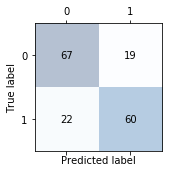

Tuning hyper-parameters for precision

Best score with tuned parameters uring GridSearchCV:  0.8154614189534286

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.1, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.784 (+/-0.094) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.794 (+/-0.093) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.795 (+/-0.101) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.796 (+/-0.099) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.795 (+/-0.101) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.795 (+/-0.101) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.795 (+/-0.101) for {'clf__C': 1000.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'c

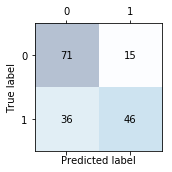

Tuning hyper-parameters for recall

Best score with tuned parameters uring GridSearchCV:  0.8834716929776809

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 100.0, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.883 (+/-0.120) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.880 (+/-0.115) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.871 (+/-0.126) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.874 (+/-0.119) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.871 (+/-0.126) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.871 (+/-0.126) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.871 (+/-0.126) for {'clf__C': 1000.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf

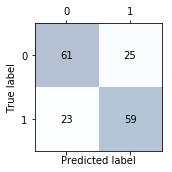

Tuning hyper-parameters for f1

Best score with tuned parameters uring GridSearchCV:  0.834038173317327

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.01, 'clf__kernel': 'linear'}

Grid scores on development set:

0.830 (+/-0.086) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.834 (+/-0.090) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.830 (+/-0.094) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.832 (+/-0.089) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.830 (+/-0.094) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.830 (+/-0.094) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.830 (+/-0.094) for {'clf__C': 1000.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.001, 'clf__gamma': 1.0, 'clf__ke

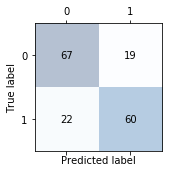

Tuning hyper-parameters for roc_auc

Best score with tuned parameters uring GridSearchCV:  0.8843050208311414

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.001, 'clf__kernel': 'linear'}

Grid scores on development set:

0.884 (+/-0.093) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.881 (+/-0.094) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.879 (+/-0.094) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.879 (+/-0.094) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.879 (+/-0.095) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.879 (+/-0.095) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.879 (+/-0.094) for {'clf__C': 1000.0, 'clf__kernel': 'linear'}
0.884 (+/-0.096) for {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.884 (+/-0.095) for {'clf__C': 0.001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.880 (+/-0.089) for {'clf__C': 0.001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
0.858 (+/-0.093) for {'clf__C': 0.001, 'clf__gamma': 1.0, '

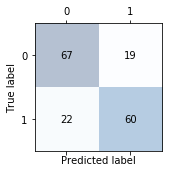

In [361]:
#Using Gridsearch to find the most optimal hyperparameters for SVM Classifier

#Specifying parameter values:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf'] }]

#Specifying metrics for evaluation
scores = ['accuracy',
          'precision',
         'recall',
          'f1',
         'roc_auc']

#Performing GridSearchCV, optimising for the different evalutation metrics
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=1, 
                  scoring=score)
    
    gs.fit(X_train,y_train)
    
    print('Best score with tuned parameters uring GridSearchCV: ', gs.best_score_)
    print()
    print('Best parameters set found on development set using GridSearchCV: \n',gs.best_params_)

    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    clf= gs.best_estimator_

#Using cross validation to determine the final scores
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1,scoring = score )
    
    print('--> Final Model Training score using Cross Validation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final score on Test set: %.5f' % clf.score(X_test,y_test))

    y_true, y_pred = y_test, clf.predict(X_test)
   
    print()
    print("Confusion matrix:")
    print()
    print(confusion_matrix(y_true, y_pred))
    confmat = confusion_matrix(y_true, y_pred)
    print()
    print("Detailed classification report:")
    print()
    print(classification_report(y_true, y_pred))
    print()
    
    pipelines_SVC.append((score, clf))
#Plotting the confusion matrix
    print("Confusion matrix:")
    print()
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
   




In [368]:
pipelines_SVC

[('Scaled_SVM_pipeline', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('Scaled_SVM_pipeline_no_PCA', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('accuracy', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, 

In [369]:
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines_SVC:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_SVM_pipeline: 0.825103 (0.047251)
Scaled_SVM_pipeline_no_PCA: 0.826574 (0.044586)
accuracy: 0.829559 (0.044734)
precision: 0.708362 (0.048847)
recall: 0.826619 (0.043707)
f1: 0.829559 (0.044734)
roc_auc: 0.823589 (0.043349)


In [392]:
names=['SVM_pipeline','SVM_pipeline_no_PCA','Tuned_SVM_acc','Tuned_SVM_pre',
        'Tuned_SVM_re','Tuned_SVM_f1','Tuned_SVM_auc']

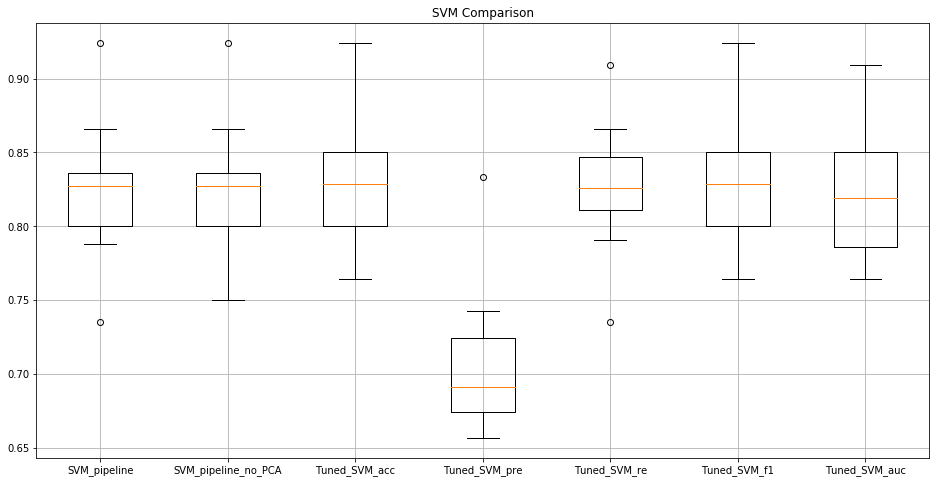

In [393]:
# Compare Algorithms
fig= plt.figure(figsize=(16, 8))
#fig.suptitle( 'SVM Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.title('SVM Comparison')
#plt.xticks(['Scaled_SVM_pipeline','Scaled_SVM_pipeline_no_PCA','Tuned_SVM_acc','Tuned_SVM_pre',
        #'Tuned_SVM_re','Tuned_SVM_f1','Tuned_SVM_auc'])
plt.grid(True) 
ax.set_xticklabels(names)
plt.show()

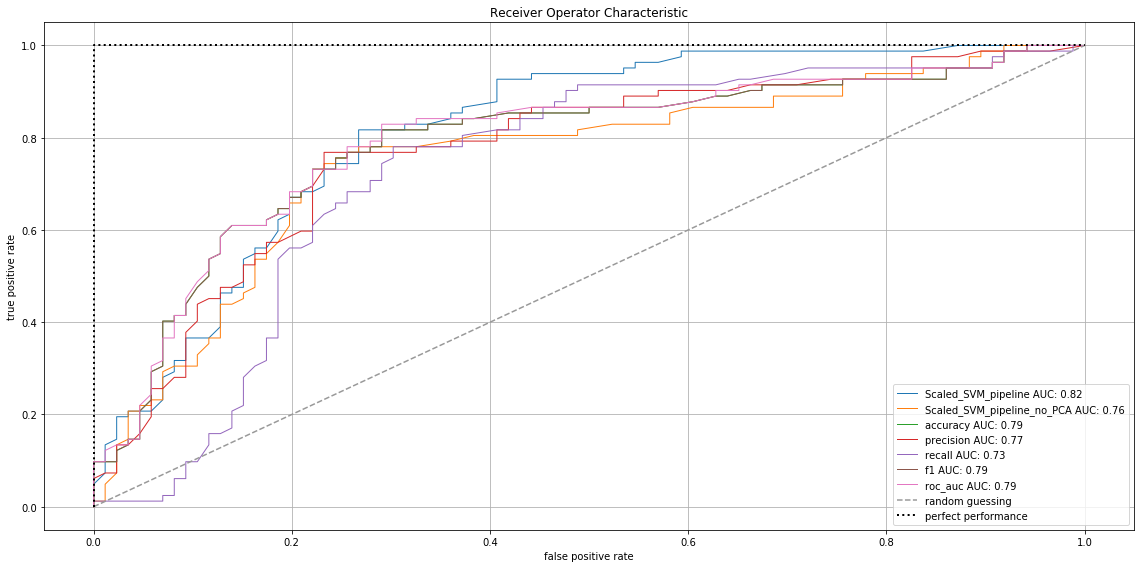

In [394]:
#Ploting the ROC curves for the different SVCs
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name,model in pipelines_SVC:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(True)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [404]:
#Determining the effect that different number of PCA components have on the MLP model accuracy
def plotvector(X_train, y_train, X_test, y_test):
    results_MLP_PCA = []
    
    for i in range(1, 6):
        pipe_MLP_PCA = Pipeline([('scl', StandardScaler()),
                                 ('pca', PCA(n_components=i)),
                                 ('clf',  MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=250, alpha=1e-4,
                    activation='logistic', verbose=10, tol=1e-4, random_state=1))])
        
         
        
        pipe_MLP_PCA.fit(X_train, y_train)
        results_MLP_PCA.append([i, pipe_MLP_PCA.score(X_test, y_test)])
 
    return np.array(results_MLP_PCA)
PCA_accuracy_MLP =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy_MLP


Iteration 1, loss = 0.72679863
Iteration 2, loss = 0.69474399
Iteration 3, loss = 0.70216065
Iteration 4, loss = 0.69631602
Iteration 5, loss = 0.69169483
Iteration 6, loss = 0.69432745
Iteration 7, loss = 0.69410711
Iteration 8, loss = 0.69105271
Iteration 9, loss = 0.68922266
Iteration 10, loss = 0.68939693
Iteration 11, loss = 0.68769723
Iteration 12, loss = 0.68609718
Iteration 13, loss = 0.68491717
Iteration 14, loss = 0.68241833
Iteration 15, loss = 0.67970177
Iteration 16, loss = 0.67931218
Iteration 17, loss = 0.67407019
Iteration 18, loss = 0.66973002
Iteration 19, loss = 0.66430211
Iteration 20, loss = 0.65652284
Iteration 21, loss = 0.64692247
Iteration 22, loss = 0.63533220
Iteration 23, loss = 0.62183255
Iteration 24, loss = 0.60421889
Iteration 25, loss = 0.58642164
Iteration 26, loss = 0.56532172
Iteration 27, loss = 0.54282932
Iteration 28, loss = 0.51900449
Iteration 29, loss = 0.49645402
Iteration 30, loss = 0.47623243
Iteration 31, loss = 0.45834107
Iteration 32, los

Iteration 13, loss = 0.67160190
Iteration 14, loss = 0.66517598
Iteration 15, loss = 0.65642983
Iteration 16, loss = 0.64565085
Iteration 17, loss = 0.63204870
Iteration 18, loss = 0.61454468
Iteration 19, loss = 0.59334253
Iteration 20, loss = 0.57027829
Iteration 21, loss = 0.54352447
Iteration 22, loss = 0.51639379
Iteration 23, loss = 0.48960825
Iteration 24, loss = 0.46571001
Iteration 25, loss = 0.44669533
Iteration 26, loss = 0.43295086
Iteration 27, loss = 0.42350779
Iteration 28, loss = 0.41929269
Iteration 29, loss = 0.41612589
Iteration 30, loss = 0.41314850
Iteration 31, loss = 0.41254556
Iteration 32, loss = 0.41268600
Iteration 33, loss = 0.41285888
Iteration 34, loss = 0.41058385
Iteration 35, loss = 0.41512750
Iteration 36, loss = 0.41322648
Iteration 37, loss = 0.41510705
Iteration 38, loss = 0.41143356
Iteration 39, loss = 0.41268591
Iteration 40, loss = 0.41103287
Iteration 41, loss = 0.41453839
Iteration 42, loss = 0.41087850
Iteration 43, loss = 0.41225932
Iteratio

array([[1.        , 0.75595238],
       [2.        , 0.75595238],
       [3.        , 0.75595238],
       [4.        , 0.75595238],
       [5.        , 0.75595238]])

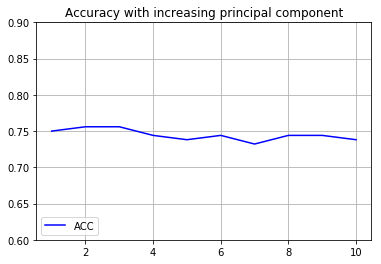

In [268]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy_MLP[:,0], PCA_accuracy_MLP[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.title("Accuracy with increasing principal component")
plt.show()

In [400]:
#Scaling the data to have mean value of 0 and a standard deviation of 1.
data = X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [401]:
#split the data into training and testing sets, 80% of data will be used for training and 20% of data is kept aside for testing
X_train, X_test, y_train, y_test = \
    train_test_split(scaled_data, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [402]:
pipelines_MLP = []

# Tuning hyper-parameters for accuracy

--> Tuned Parameters Best Score:  0.8278443113772455

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'adam'}
--> Final Model Training Accuracy score: 0.822 +/- 0.048

--> Final Accuracy score on Test set: 0.75000

Confusion matrix:
[[67 19]
 [23 59]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168




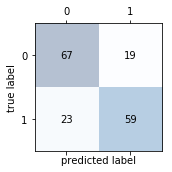

# Tuning hyper-parameters for precision

--> Tuned Parameters Best Score:  0.8070316691899613

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.819 +/- 0.059

--> Final Accuracy score on Test set: 0.74405

Confusion matrix:
[[68 18]
 [25 57]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        86
           1       0.76      0.70      0.73        82

   micro avg       0.74      0.74      0.74       168
   macro avg       0.75      0.74      0.74       168
weighted avg       0.75      0.74      0.74       168




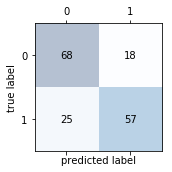

# Tuning hyper-parameters for recall

--> Tuned Parameters Best Score:  0.9387232527951093

--> Best parameters set found on development set: 
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.715 +/- 0.085

--> Final Accuracy score on Test set: 0.70833

Confusion matrix:
[[55 31]
 [18 64]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        86
           1       0.67      0.78      0.72        82

   micro avg       0.71      0.71      0.71       168
   macro avg       0.71      0.71      0.71       168
weighted avg       0.71      0.71      0.71       168




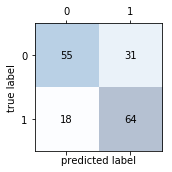

# Tuning hyper-parameters for f1

--> Tuned Parameters Best Score:  0.8306489264639242

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.827 +/- 0.046

--> Final Accuracy score on Test set: 0.75000

Confusion matrix:
[[67 19]
 [23 59]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168




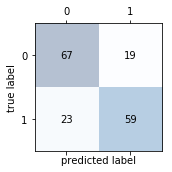

# Tuning hyper-parameters for roc_auc

--> Tuned Parameters Best Score:  0.8867170390676448

--> Best parameters set found on development set: 
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'adam'}
--> Final Model Training Accuracy score: 0.827 +/- 0.051

--> Final Accuracy score on Test set: 0.75000

Confusion matrix:
[[67 19]
 [23 59]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168




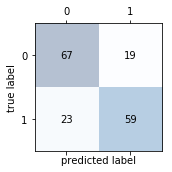

In [403]:
import warnings
warnings.filterwarnings("ignore")
mlp = MLPClassifier(max_iter=150, tol=1e-4, random_state=1)
#Tuning hyperparameters, specifing a range of values for the GridSearch to select the optimal hyperparamater values
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100), (100,50,100),(100,150,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
     'learning_rate_init':[0.0001],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 1],
    'learning_rate': ['constant','adaptive']    
}

scores = ['accuracy',
         'precision', 
         'recall',
         'f1',
         'roc_auc',]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

   #Using GridSearch to optimise for Accuracy
    gs_mlp =GridSearchCV(mlp, parameter_space, n_jobs=1,cv=5,scoring=score)

#Fitting Gridsearch to the training data
    gs_mlp = gs_mlp.fit(X_train, y_train)
    
    print('--> Tuned Parameters Best Score: ',gs_mlp.best_score_)
    print()
    print('--> Best parameters set found on development set: \n',gs_mlp.best_params_)

   # print()
   # print("Grid scores on development set:")
   # print()
    #means = gs_mlp.cv_results_['mean_test_score']
    #stds = gs_mlp.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs_mlp.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r"
              #% (mean, std * 2, params))
    #print()
    
    clf_mlp= gs_mlp.best_estimator_

#Get Final Scores
    clf_mlp.fit(X_train, y_train)
    scores = cross_val_score(estimator= clf_mlp,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    
    print('--> Final Model Training Accuracy score: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final Accuracy score on Test set: %.5f' %  clf_mlp.score(X_test,y_test))

    y_true, y_pred = y_test,  clf_mlp.predict(X_test)
    
    pipelines_MLP.append((score, clf_mlp))
    
 
    confmat = confusion_matrix(y_true, y_pred)
   
    print()
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    print("Detailed classification report:")
    print(classification_report(y_true, y_pred))
    print()
    
    
    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()





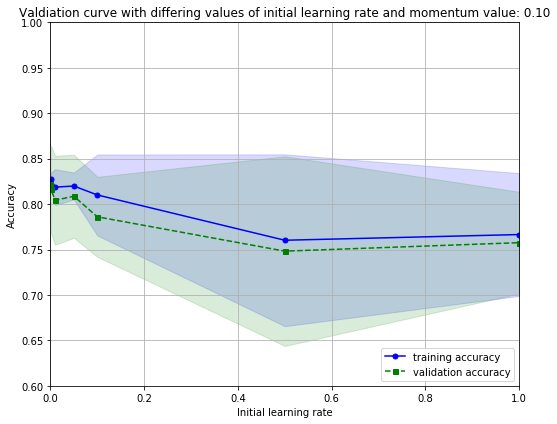

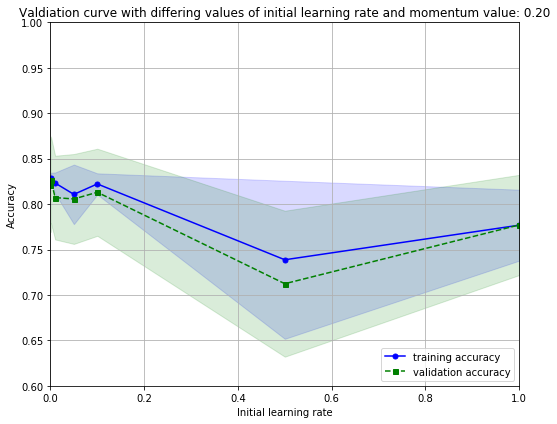

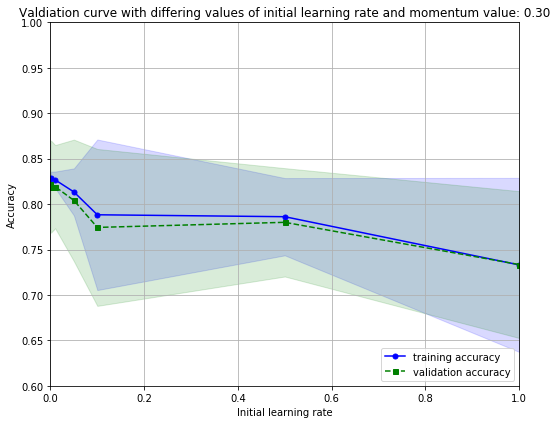

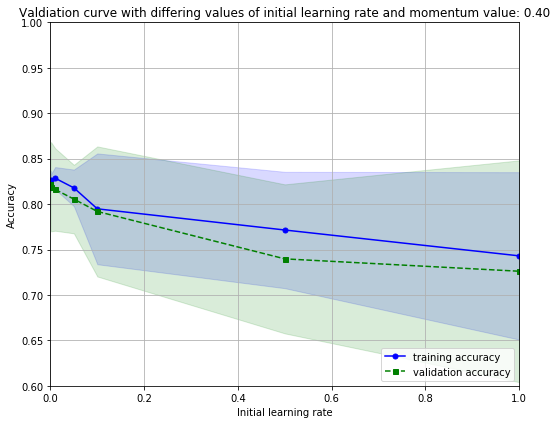

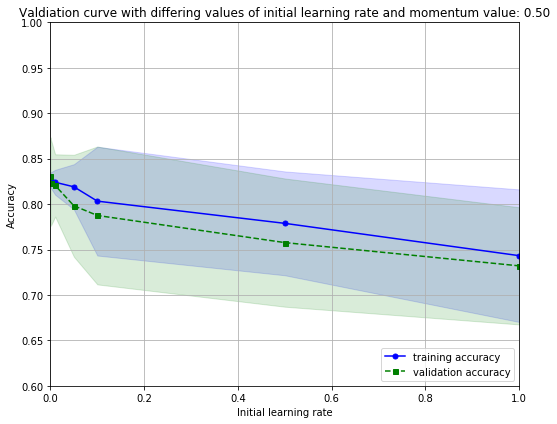

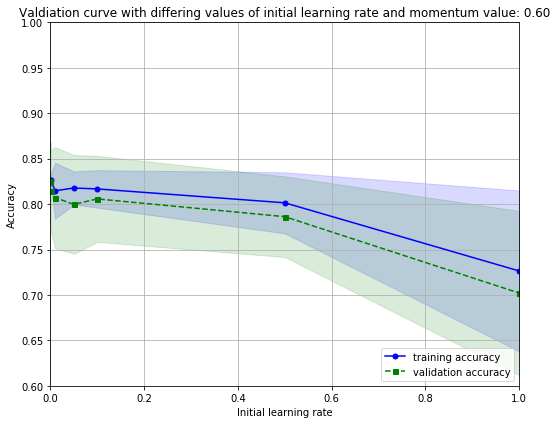

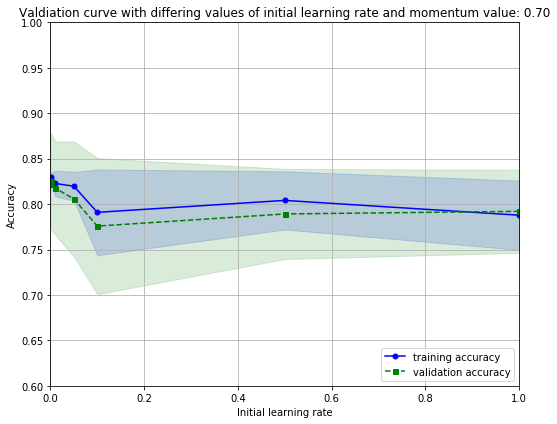

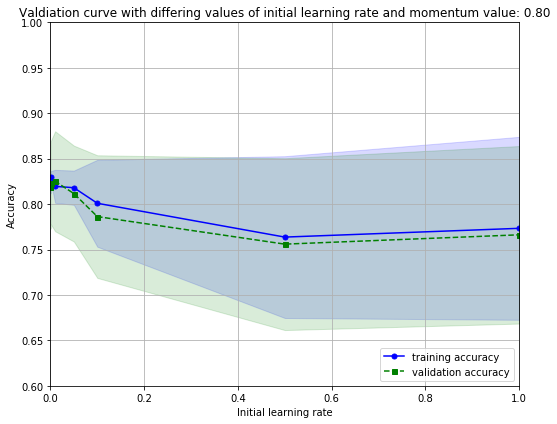

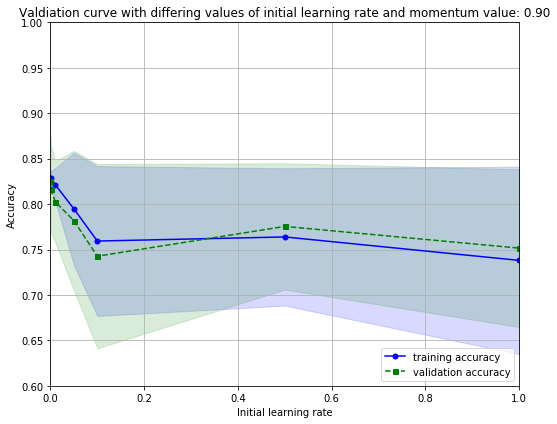

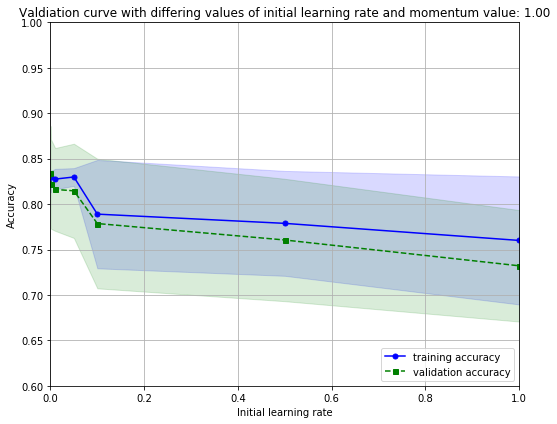

In [405]:
#Using validation curve to determine initial learning rate and momentum values that give the best results for accuracy
from sklearn.model_selection import validation_curve


for i in np.linspace(0.1,1,10):
#finding the optimal value of initial learning rate using validation curve
    param_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]
    train_scores, test_scores = validation_curve(
                estimator=MLPClassifier(momentum = i), 
                X=X_train, 
                y=y_train, 
                param_name='learning_rate_init', 
                param_range =param_range, cv= 10)
    


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

    plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

#plotting the C paramater values agains the relevant accuracy values
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Initial learning rate')
    plt.ylabel('Accuracy')
    plt.ylim([0.6, 1.0])
    plt.xlim([0, 1])
    plt.title('Valdiation curve with differing values of initial learning rate and momentum value: %.2f' %(i))
    plt.tight_layout()
    plt.show()

In [406]:

#Rerunninung the MLP with the initial learning rate  and momentum values that gave the best accuracy
pipe_MLP_2 = Pipeline([('scl', StandardScaler()), #not needed because most frequent class label used for prediction only
                     ('MLP_2',MLPClassifier(hidden_layer_sizes=(100,100,100), activation='tanh', solver='adam', alpha=1, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.8, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))])

#Fit the pipeline to the training data
pipe_MLP_2.fit(X_train, y_train)   

scores = cross_val_score(estimator=pipe_MLP_2, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)

print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_MLP_2.score(X_test,y_test))

pipelines_MLP.append(( 'Validation_curve_tuned_MLP_pipeline', pipe_MLP_2))

--> Final Model Training Accuracy: 0.827 +/- 0.045
--> Final Accuracy on Test set: 0.75595


In [407]:
pipe_MLP_2.fit(X_train, y_train)
y_pred = pipe_MLP_2.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7559523809523809
[[68 18]
 [23 59]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        86
           1       0.77      0.72      0.74        82

   micro avg       0.76      0.76      0.76       168
   macro avg       0.76      0.76      0.76       168
weighted avg       0.76      0.76      0.76       168



In [408]:
del pipelines_MLP[3:4]

In [409]:
pipelines_MLP


[('accuracy',
  MLPClassifier(activation='tanh', alpha=1, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
         learning_rate_init=0.0001, max_iter=150, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=1, shuffle=True, solver='adam', tol=0.0001,
         validation_fraction=0.1, verbose=False, warm_start=False)),
 ('precision',
  MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100, 150, 100), learning_rate='constant',
         learning_rate_init=0.0001, max_iter=150, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=1, shuffle=True, solver='sgd', tol=0.0001,
         validation_fraction=0.1, verbose=False, warm_start=False)),
 ('recall',
  MLPClassif

In [410]:
from sklearn.dummy import DummyClassifier
pipe_Dummy = Pipeline([('scl', StandardScaler()), #not needed because most frequent class label used for prediction only
                     ('clf', DummyClassifier(strategy="most_frequent"))])

pipelines_MLP.append(( 'ScaledDummy', pipe_Dummy))

In [411]:
results_mlp = []
names_mlp = []
scoring = 'accuracy'
for name, model in pipelines_MLP:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_mlp.append(cv_results)
    names_mlp.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

accuracy: 0.822073 (0.048145)
precision: 0.819064 (0.058684)
recall: 0.714626 (0.084960)
roc_auc: 0.826641 (0.050897)
Validation_curve_tuned_MLP_pipeline: 0.831096 (0.045196)
ScaledDummy: 0.511987 (0.003698)


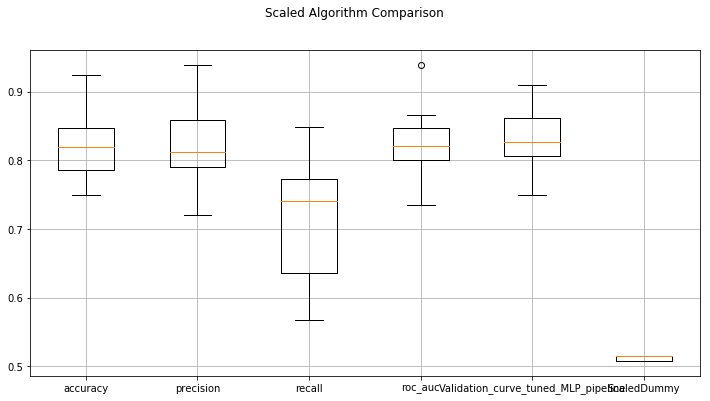

In [412]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 6))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.grid(True)
plt.boxplot(results_mlp)
ax.set_xticklabels(names_mlp)
plt.show()

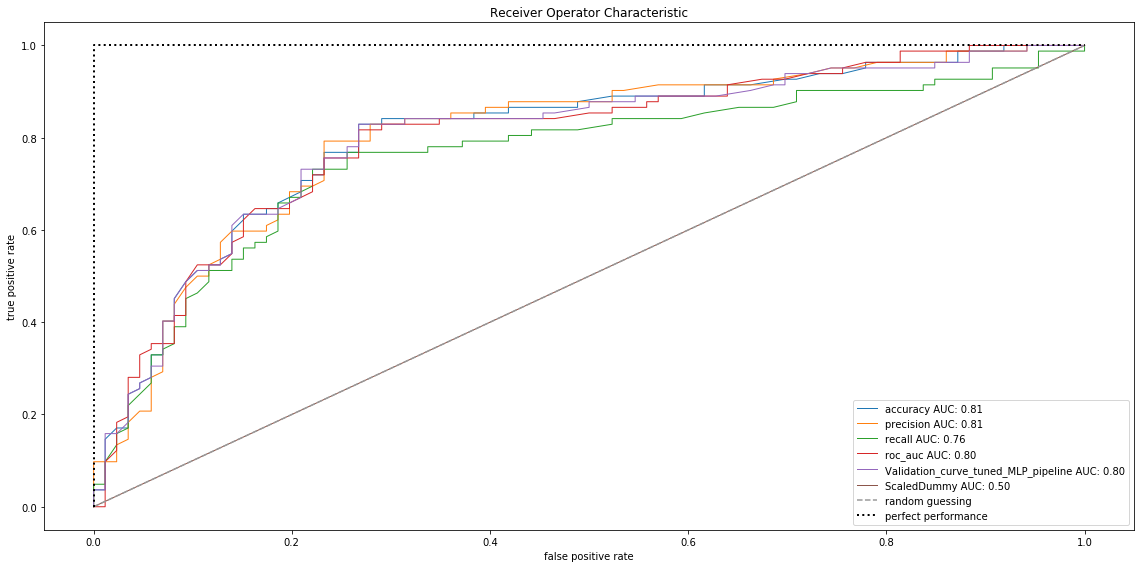

In [413]:
#Plotting theROC curves for the differently tuned MLP classifiers
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_MLP:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [414]:
pipelines_comparison=[]

In [415]:
pipelines_comparison.append(pipelines_SVC[2])

In [416]:
pipelines_comparison.append(pipelines_MLP[2])

In [417]:
pipelines_comparison

[('accuracy', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('recall',
  MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
         learning_rate_init=0.0001, max_iter=150, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=1, shuffle=True, solver='sgd', tol=0.0001,
         validation_fraction=0.1, verbose=False, warm_start=False))]

In [418]:
results_final = []
names_final = []
scoring = 'accuracy'
for name, model in pipelines_comparison:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_final.append(cv_results)
    names_final.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

accuracy: 0.829559 (0.044734)
recall: 0.714626 (0.084960)


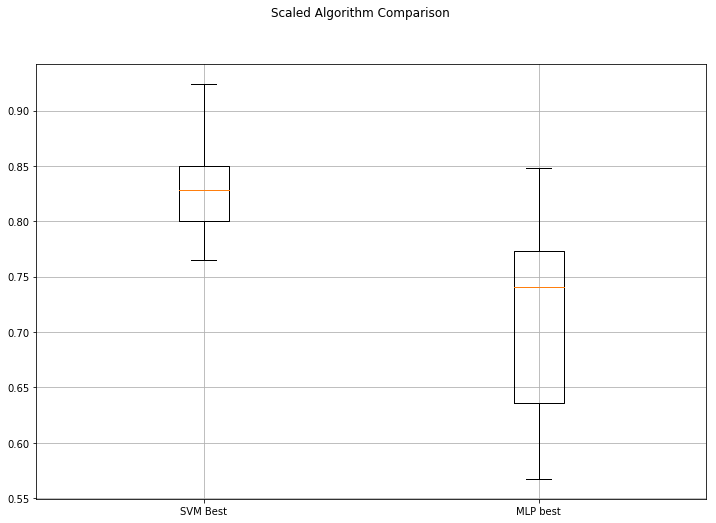

In [419]:
# Compare Algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results_final)
ax.set_xticklabels(('SVM Best', 'MLP best'))
plt.grid(True)
plt.show()

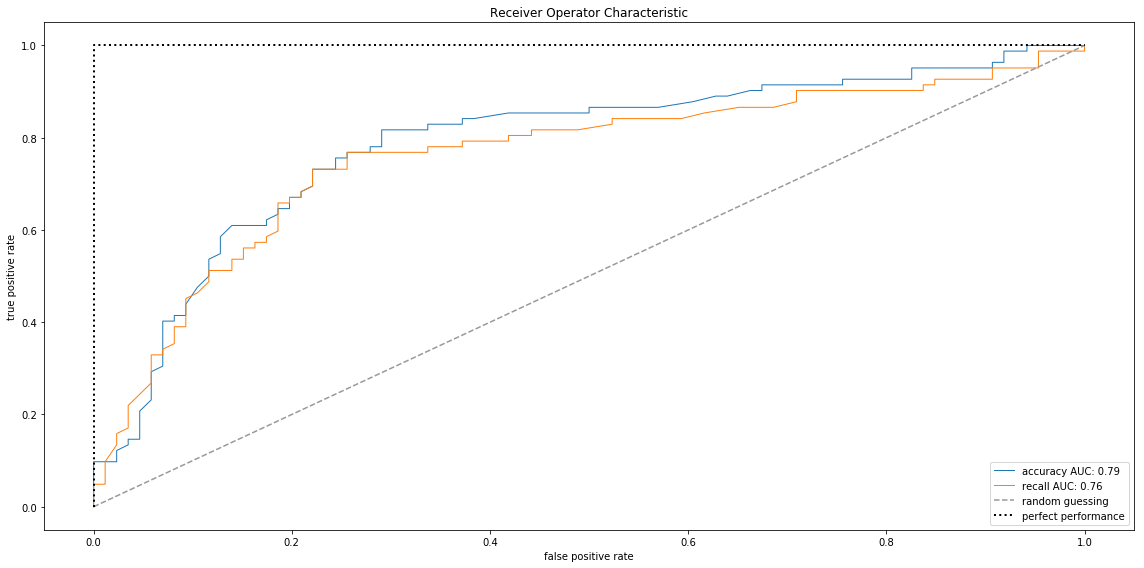

In [420]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_comparison:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
~